## Pandas in 2 mins
You can't learn Pandas in 2 mins, but here are some of the basics needed for this course.

First, you can define a dict containing credit card payments, labeled as fraud or not-fraud, and create a Pandas DataFrame from it.

In [12]:
import pandas as pd

data = { 
    'credit_card_number': ['1111 2222 3333 4444', '1111 2222 3333 4444','1111 2222 3333 4444',
                           '1111 2222 3333 4444'],
    'trans_datetime': ['2022-01-01 08:44', '2022-01-01 19:44', '2022-01-01 20:44', '2022-01-01 20:55'],
    'amount': [142.34, 12.34, 66.29, 112.33],
    'location': ['Sao Paolo', 'Rio De Janeiro', 'Stockholm', 'Stockholm'],
    'fraud': [False, False, True, True] 
}

df = pd.DataFrame.from_dict(data)
df['trans_datetime']= pd.to_datetime(df['trans_datetime'])
df

,credit_card_number,trans_datetime,amount,location,fraud
0,1111 2222 3333 4444,2022-01-01 08:44:00,142.34,Sao Paolo,False
1,1111 2222 3333 4444,2022-01-01 19:44:00,12.34,Rio De Janeiro,False
2,1111 2222 3333 4444,2022-01-01 20:44:00,66.29,Stockholm,True
3,1111 2222 3333 4444,2022-01-01 20:55:00,112.33,Stockholm,True


In [13]:
df

,credit_card_number,trans_datetime,amount,location,fraud
0,1111 2222 3333 4444,2022-01-01 08:44:00,142.34,Sao Paolo,False
1,1111 2222 3333 4444,2022-01-01 19:44:00,12.34,Rio De Janeiro,False
2,1111 2222 3333 4444,2022-01-01 20:44:00,66.29,Stockholm,True
3,1111 2222 3333 4444,2022-01-01 20:55:00,112.33,Stockholm,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   credit_card_number  4 non-null      object        
 1   trans_datetime      4 non-null      datetime64[ns]
 2   amount              4 non-null      float64       
 3   location            4 non-null      object        
 4   fraud               4 non-null      bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 260.0+ bytes


In [15]:
df['trans_datetime']= pd.to_datetime(df['trans_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   credit_card_number  4 non-null      object        
 1   trans_datetime      4 non-null      datetime64[ns]
 2   amount              4 non-null      float64       
 3   location            4 non-null      object        
 4   fraud               4 non-null      bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 260.0+ bytes


In [16]:
df.head()

,credit_card_number,trans_datetime,amount,location,fraud
0,1111 2222 3333 4444,2022-01-01 08:44:00,142.34,Sao Paolo,False
1,1111 2222 3333 4444,2022-01-01 19:44:00,12.34,Rio De Janeiro,False
2,1111 2222 3333 4444,2022-01-01 20:44:00,66.29,Stockholm,True
3,1111 2222 3333 4444,2022-01-01 20:55:00,112.33,Stockholm,True


### Lambda functions

We will now apply a lambda function to the column `amount` and save the result in a new column `is_big` in our DataFrame `df`.

In [17]:
df['is_big'] = df['amount'].apply(lambda amount: amount > 100)
df

,credit_card_number,trans_datetime,amount,location,fraud,is_big
0,1111 2222 3333 4444,2022-01-01 08:44:00,142.34,Sao Paolo,False,True
1,1111 2222 3333 4444,2022-01-01 19:44:00,12.34,Rio De Janeiro,False,False
2,1111 2222 3333 4444,2022-01-01 20:44:00,66.29,Stockholm,True,False
3,1111 2222 3333 4444,2022-01-01 20:55:00,112.33,Stockholm,True,True


### Apply and UDFs

We will now apply a user-defined function (UDF), `is_small`, to each row in the data DataFrame `df`.  
The result is a series that we store in a new column in `df` called 'is_small'.

In [18]:
def is_small(row):
    return row['amount'] < 60
    
df['is_small'] = df.apply(is_small, axis=1)
df

,credit_card_number,trans_datetime,amount,location,fraud,is_big,is_small
0,1111 2222 3333 4444,2022-01-01 08:44:00,142.34,Sao Paolo,False,True,False
1,1111 2222 3333 4444,2022-01-01 19:44:00,12.34,Rio De Janeiro,False,False,True
2,1111 2222 3333 4444,2022-01-01 20:44:00,66.29,Stockholm,True,False,False
3,1111 2222 3333 4444,2022-01-01 20:55:00,112.33,Stockholm,True,True,False


In [19]:
def is_med(row):
    return row['amount'] > 60 and row['amount'] < 100

df['is_med'] = df.apply(is_med, axis=1)
df

,credit_card_number,trans_datetime,amount,location,fraud,is_big,is_small,is_med
0,1111 2222 3333 4444,2022-01-01 08:44:00,142.34,Sao Paolo,False,True,False,False
1,1111 2222 3333 4444,2022-01-01 19:44:00,12.34,Rio De Janeiro,False,False,True,False
2,1111 2222 3333 4444,2022-01-01 20:44:00,66.29,Stockholm,True,False,False,True
3,1111 2222 3333 4444,2022-01-01 20:55:00,112.33,Stockholm,True,True,False,False


## Rolling Windows

We will compute a rolling window over the day.

In [20]:
df_rolling = df.set_index('trans_datetime')
df_rolling

,credit_card_number,amount,location,fraud,is_big,is_small,is_med
trans_datetime,,,,,,,
2022-01-01 08:44:00,1111 2222 3333 4444,142.34,Sao Paolo,False,True,False,False
2022-01-01 19:44:00,1111 2222 3333 4444,12.34,Rio De Janeiro,False,False,True,False
2022-01-01 20:44:00,1111 2222 3333 4444,66.29,Stockholm,True,False,False,True
2022-01-01 20:55:00,1111 2222 3333 4444,112.33,Stockholm,True,True,False,False


This rolling window will find the maximum value of the column `amount` in the last day. Last day is specified by the `window` parameter ('1d').

In [27]:
df_rolling['rolling_max_1d'] = df_rolling.rolling('1d').amount.max()
df_rolling

,credit_card_number,amount,location,fraud,is_big,is_small,is_med,rolling_max_1d
trans_datetime,,,,,,,,
2022-01-01 08:44:00,1111 2222 3333 4444,142.34,Sao Paolo,False,True,False,False,142.34
2022-01-01 19:44:00,1111 2222 3333 4444,12.34,Rio De Janeiro,False,False,True,False,142.34
2022-01-01 20:44:00,1111 2222 3333 4444,66.29,Stockholm,True,False,False,True,142.34
2022-01-01 20:55:00,1111 2222 3333 4444,112.33,Stockholm,True,True,False,False,142.34


Let's create a new DataFrame, `d2`, with new data.

In [28]:
import numpy as np
import timeit 

df2 = pd.DataFrame({
    'a':np.random.randint(1,100, size=10000),
    'b':np.random.randint(100,1000, size=10000),
    'c':np.random.random(10000)
})
df2.shape
(100000, 3)

(100000, 3)

### Vectorized operations are faster than "apply" with UDFs

We will see that apply is approximately 50 times slower than the equivalent vectorized operation on 100k rows.



In [29]:
%%timeit
df2['a'].apply(lambda x: x**2)

5.54 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


This vectorized operation is much faster

In [30]:
%%timeit
df2['a'] ** 2

85.9 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [31]:
df2.describe()

,a,b,c
count,10000.000000,10000.000000,10000.000000
mean,50.304200,546.759100,0.500919
std,28.445136,258.844389,0.291717
min,1.000000,100.000000,0.000022
25%,25.000000,323.000000,0.245393
50%,51.000000,547.000000,0.501051
75%,75.000000,768.000000,0.753209
max,99.000000,999.000000,0.999931


In [32]:
df.trans_datetime.unique()

array(['2022-01-01T08:44:00.000000000', '2022-01-01T19:44:00.000000000',
       '2022-01-01T20:44:00.000000000', '2022-01-01T20:55:00.000000000'],
      dtype='datetime64[ns]')

In [33]:
df.credit_card_number.nunique()

1

In [34]:
df.isnull().sum()

credit_card_number    0
trans_datetime        0
amount                0
location              0
fraud                 0
is_big                0
is_small              0
is_med                0
dtype: int64

## Transformations

Plot a histogram with a long tail.
Use numpy to seed the random number generator and generate a univariate data sample.


<AxesSubplot:ylabel='Count'>

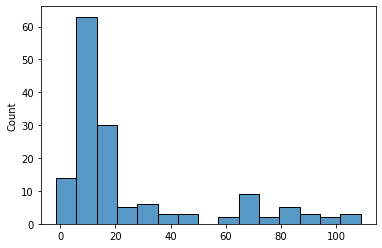

In [36]:
import seaborn as sns

from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
seed(1)
array = 5 * randn(100) + 10
tail = 10 + (rand(50) * 100)
array = append(array, tail)
sns.histplot(array)

In [37]:
columns = ['amount']
df_exp = pd.DataFrame(data = array, columns = columns)
  
df_exp.describe()

,amount
count,150.000000
mean,25.194928
std,27.371117
min,-1.507693
25%,8.683707
50%,12.923596
75%,28.576996
max,108.861615


In [38]:
df_exp

,amount
0,18.121727
1,6.941218
2,7.359141
3,4.635157
4,14.327038
...,...
145,31.017401
146,85.275555
147,16.653648
148,36.031510


## Standard Scalar in Vectorized Pandas

This is an efficient way to transform our input Pandas column into a range of [0.0, 1.]

In [39]:
# Min-Max Normalization in Pandas
df_norm = (df_exp-df_exp.min())/(df_exp.max()-df_exp.min())
df_norm.head()

,amount
0,0.177852
1,0.076551
2,0.080338
3,0.055657
4,0.143470


<AxesSubplot:ylabel='Count'>

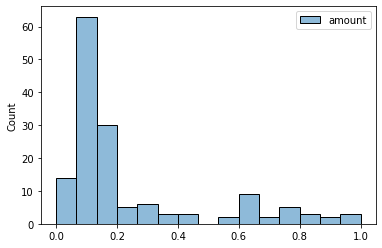

In [40]:
sns.histplot(df_norm)

## Power Transformer in Scikit-Learn

Scikit-Learn has many different transformation libraries.
For heavy-tailed distributions, it is often recommended to perform a [power transformation](
https://towardsdatascience.com/how-to-differentiate-between-scaling-normalization-and-log-transformations-69873d365a94)

We can see in the histogram, this produces a more Gaussian (normal) distribution than the MinMax Scalar.

<AxesSubplot:ylabel='Count'>

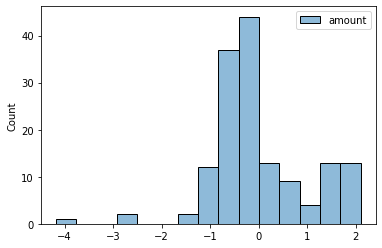

In [41]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

df_power = pd.DataFrame(
    pt.fit_transform(df_exp[["amount"]]), columns=["amount"]
)

sns.histplot(df_power)

We wish for distributions that are more Gaussian for machine learning algorithms since they operate on the assumption that the distributions are smoothly varying, are differentiable, and have the posibility for infinite surprise.